In [1]:
import pandas as pd
import numpy as np
import re
import nltk

In [2]:
from gensim.models import word2vec,FastText

In [3]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("train.csv")

In [5]:
data.head()

id  qid1  qid2                                          question1  \
0   0     1     2  What is the step by step guide to invest in sh...   
1   1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2   2     5     6  How can I increase the speed of my internet co...   
3   3     7     8  Why am I mentally very lonely? How can I solve...   
4   4     9    10  Which one dissolve in water quikly sugar, salt...   

                                           question2  is_duplicate  
0  What is the step by step guide to invest in sh...             0  
1  What would happen if the Indian government sto...             0  
2  How can Internet speed be increased by hacking...             0  
3  Find the remainder when [math]23^{24}[/math] i...             0  
4            Which fish would survive in salt water?             0

In [6]:
STOP_WORDS = nltk.corpus.stopwords.words()

In [7]:
def clean_sen(val):
    regex = re.compile('([^\s\w]|_)+')
    sentence = regex.sub('', val).lower()
    sentence = sentence.split(" ")
    
    for word in list(sentence):
        if word in STOP_WORDS:
            sentence.remove(word)
            
    sentence = " ".join(sentence)
    return sentence

In [8]:
data = data.dropna()

In [9]:
for col in ['question1', 'question2']:
    data[col] = data[col].apply(clean_sen)

In [10]:
data.head(5)

id  qid1  qid2                                          question1  \
0   0     1     2          step step guide invest share market india   
1   1     3     4                    story kohinoor kohinoor diamond   
2   2     5     6       increase speed internet connection using vpn   
3   3     7     8                              mentally lonely solve   
4   4     9    10  one dissolve water quikly sugar salt methane c...   

                                           question2  is_duplicate  
0                step step guide invest share market             0  
1  would happen indian government stole kohinoor ...             0  
2               internet speed increased hacking dns             0  
3           find remainder math2324math divided 2423             0  
4                      fish would survive salt water             0

In [11]:
corpus = []
for col in ['question1', 'question2']:
    for sentence in data[col].iteritems():
        word_list = sentence[1].split(" ")
        corpus.append(word_list)

In [12]:
corpus[:2]

[['step', 'step', 'guide', 'invest', 'share', 'market', 'india'],
 ['story', 'kohinoor', 'kohinoor', 'diamond']]

In [13]:
model = word2vec.Word2Vec(corpus, size=100,window=10,workers=4)

In [14]:
model.wv['dichotomy']

KeyError: "word 'dichotomy' not in vocabulary"

In [15]:
model_fasttext = FastText(corpus,size=100,window=10,min_count=5,workers=4,sg=1)

In [16]:
model_fasttext.wv['dichotomy'].shape

(100,)

In [17]:
labels = []
word_em = []

for word in model_fasttext.wv.vocab:
    word_em.append(model_fasttext[word])
    labels.append(word)
    
tsne = TSNE()
new_values = tsne.fit_transform(word_em)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [18]:
new_values.shape

(31401, 2)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


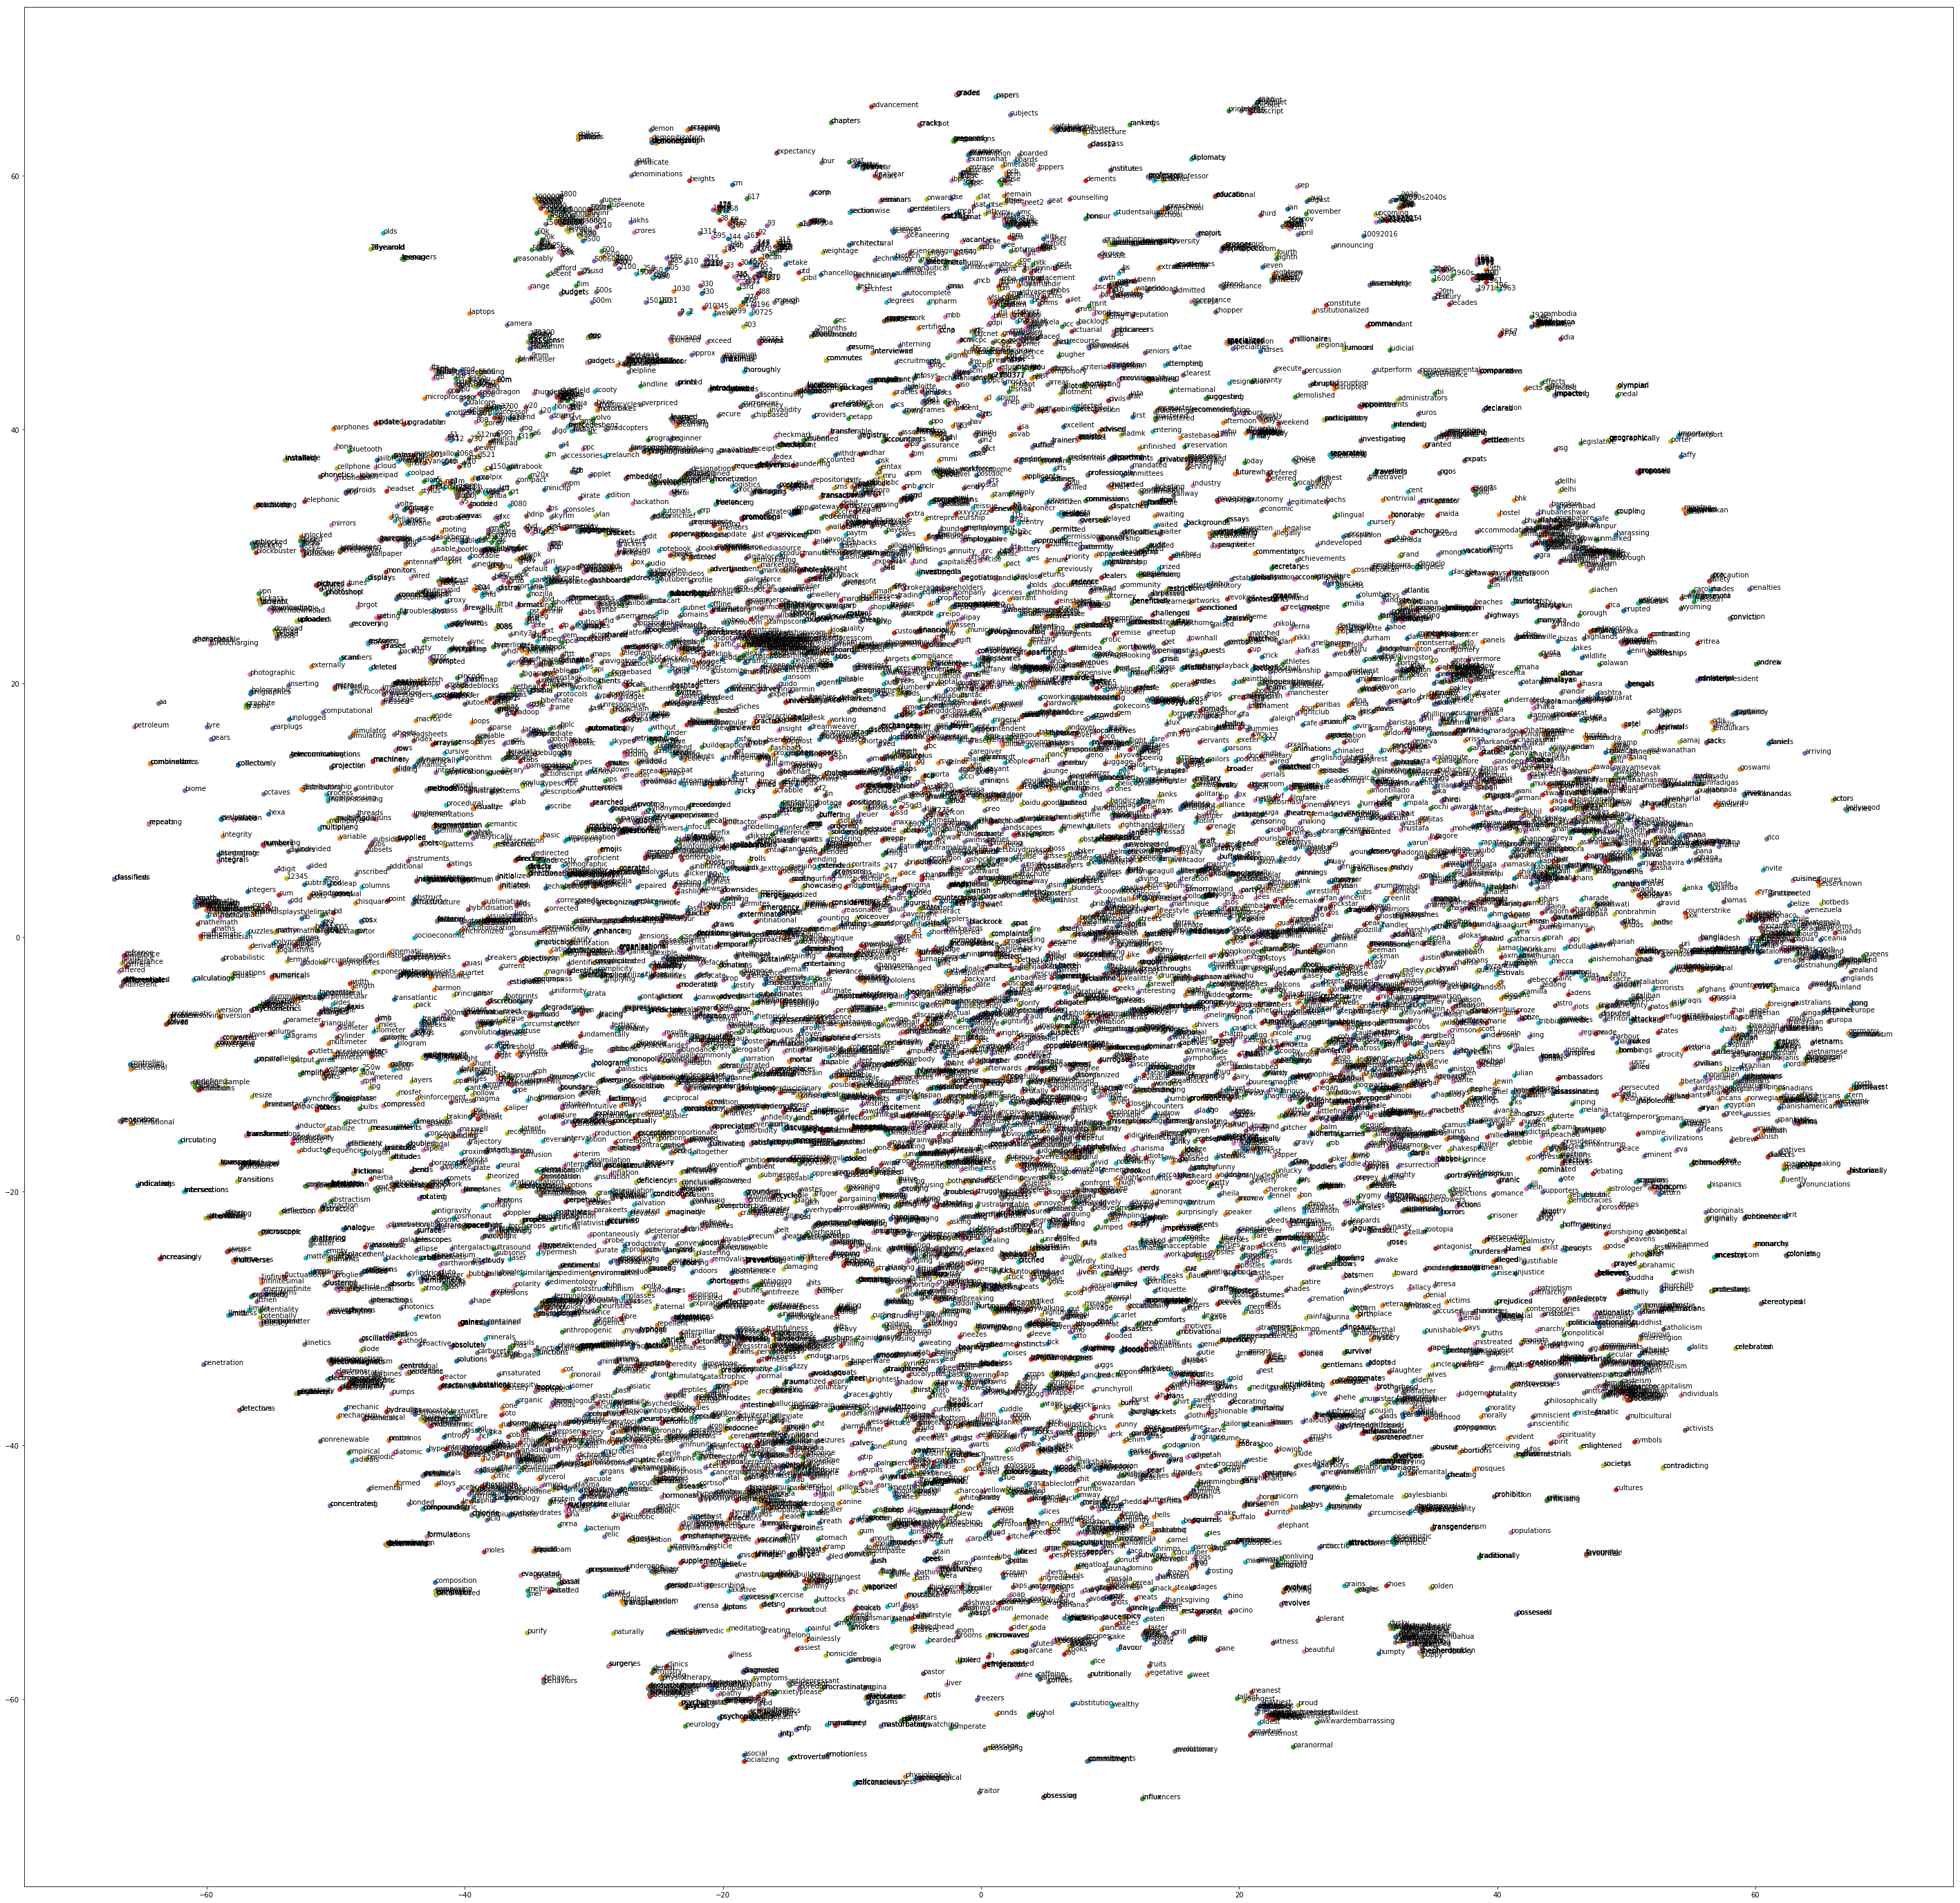

In [21]:
plt.figure(figsize=(50,50))
for ix in range(10000):
    plt.scatter(new_values[ix][0],new_values[ix][1])
    plt.annotate(labels[ix], xy=(new_values[ix][0],new_values[ix][1]))
    if ix % 1000 == 0:
        print ix
plt.show()

In [22]:
print(model_fasttext.most_similar(positive=['woman','king'], negative=['man']))

[('girlwoman', 0.7402745485305786), ('womans', 0.718360185623169), ('womanizer', 0.709518313407898), ('manwoman', 0.6854518055915833), ('menwomen', 0.6600990295410156), ('girlboy', 0.6443066596984863), ('remarried', 0.6442612409591675), ('remarry', 0.6438789367675781), ('ladyboys', 0.6436412334442139), ('women', 0.6412516236305237)]


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
